# Appendix Code

We begin with some imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, proj3d
from matplotlib import cm

## Functions

### One-to-one and onto functions on $(0,1)$.

We start by defining the domain and our one-to-one and onto function examples.

In [2]:
x = np.linspace(0, 1, 100)
titles = 'one-to-one', 'onto'
labels = '$f(x)=1/2 + x/2$', '$f(x)=4x(1-x)$'
funcs = lambda x: 1/2 + x/2, lambda x: 4 * x * (1-x)

The figure can now be produced as follows.

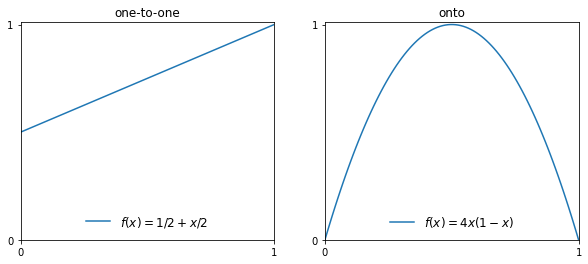

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for f, ax, lb, ti in zip(funcs, axes, labels, titles):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.01)
    ax.plot(x, f(x), label=lb)
    ax.set_title(ti, fontsize=12)
    ax.legend(loc='lower center', fontsize=12, frameon=False)
    ax.set_xticks((0, 1))
    ax.set_yticks((0, 1))

plt.show()

### Some functions are bijections

This figure can be produced in a similar manner to 6.1.

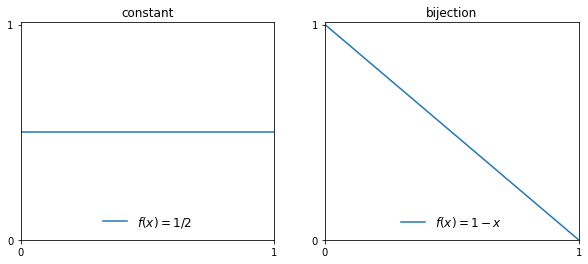

In [4]:
x = np.linspace(0, 1, 100)
titles = 'constant', 'bijection'
labels = '$f(x)=1/2$', '$f(x)=1-x$'
funcs = lambda x: 1/2 + 0 * x, lambda x: 1-x

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for f, ax, lb, ti in zip(funcs, axes, labels, titles):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.01)
    ax.plot(x, f(x), label=lb)
    ax.set_title(ti, fontsize=12)
    ax.legend(loc='lower center', fontsize=12, frameon=False)
    ax.set_xticks((0, 1))
    ax.set_yticks((0, 1))
    
plt.show()

## Fixed Points

### Graph and fixed points of $G \colon x \mapsto 2.125/(1 + x^{-4})$.

We begin by defining the domain and the function.

In [5]:
xmin, xmax = 0.0000001, 2
xgrid = np.linspace(xmin, xmax, 200)
g = lambda x: 2.125 / (1 + x**(-4))

Next we define our fixed points

In [6]:
fps_labels = ('$x_\ell$', '$x_m$', '$x_h$' )
fps = (0.01, 0.94, 1.98)
coords = ((40, 80), (40, -40), (-40, -80))

Finally we can produce the figure.

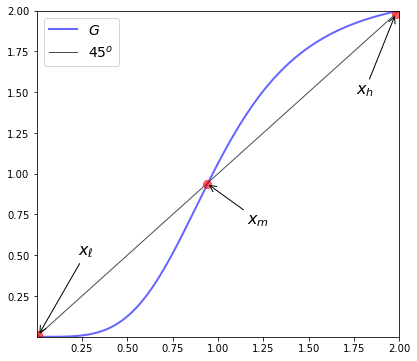

In [7]:
fig, ax = plt.subplots(figsize=(6.5, 6))

ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)

ax.plot(xgrid, g(xgrid), 'b-', lw=2, alpha=0.6, label='$G$')
ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='$45^o$')

ax.legend(fontsize=14)

ax.plot(fps, fps, 'ro', ms=8, alpha=0.6)

for (fp, lb, coord) in zip(fps, fps_labels, coords):
    ax.annotate(lb, 
             xy=(fp, fp),
             xycoords='data',
             xytext=coord,
             textcoords='offset points',
             fontsize=16,
             arrowprops=dict(arrowstyle="->"))

plt.show()

## Complex Numbers

### The complex number $(a, b) = r e^{i \phi}$. 

We start by abbreviating some useful values and functions

In [8]:
π = np.pi
zeros = np.zeros
ones = np.ones
fs = 18

Next we set our parameters.

In [9]:
r = 2
φ = π/3
x = r * np.cos(φ)
x_range = np.linspace(0, x, 1000)
φ_range = np.linspace(0, φ, 1000)

Finally we produce the plot.

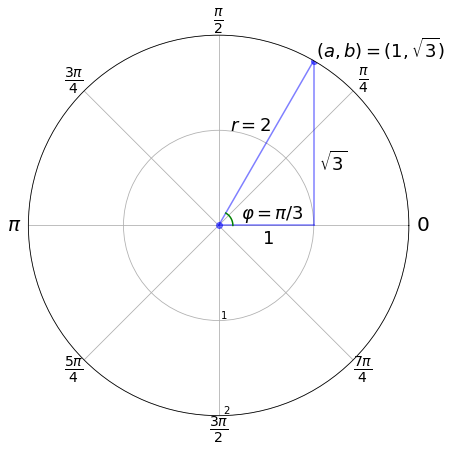

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111, projection='polar')

ax.plot((0, φ), (0, r), marker='o', color='b', alpha=0.5)          # Plot r
ax.plot(zeros(x_range.shape), x_range, color='b', alpha=0.5)       # Plot x
ax.plot(φ_range, x / np.cos(φ_range), color='b', alpha=0.5)        # Plot y
ax.plot(φ_range, ones(φ_range.shape) * 0.15, color='green')  # Plot φ

ax.margins(0) # Let the plot starts at origin

ax.set_rmax(2)
ax.set_rticks((1, 2))  # Less radial ticks
ax.set_rlabel_position(-88.5)    # Get radial labels away from plotted line

ax.text(φ, r+0.04 , r'$(a, b) = (1, \sqrt{3})$', fontsize=fs)   # Label z
ax.text(φ+0.4, 1 , '$r = 2$', fontsize=fs)                             # Label r
ax.text(0-0.4, 0.5, '$1$', fontsize=fs)                            # Label x
ax.text(0.5, 1.2, '$\sqrt{3}$', fontsize=fs)                      # Label y
ax.text(0.3, 0.25, '$\\varphi = \\pi/3$', fontsize=fs)                   # Label θ

xT=plt.xticks()[0]
xL=['0',
    r'$\frac{\pi}{4}$',
    r'$\frac{\pi}{2}$',
    r'$\frac{3\pi}{4}$',
    r'$\pi$',
    r'$\frac{5\pi}{4}$',
    r'$\frac{3\pi}{2}$',
    r'$\frac{7\pi}{4}$']

plt.xticks(xT, xL, fontsize=fs+2)
ax.grid(True)

plt.show()

## Convergence

### Convergence of a sequence to the origin in $\mathbb{R}^3$. 

We define our transformation matrix, initial point, and number of iterations.

In [11]:
θ = 0.1
A = ((np.cos(θ), - np.sin(θ), 0.0001),
     (np.sin(θ),   np.cos(θ), 0.001),
     (np.sin(θ),   np.cos(θ), 1))

A = 0.98 * np.array(A)
p = np.array((1, 1, 1))
n = 200

Now we can produce the plot by repeatedly transforming our point with the transformation matrix and plotting each resulting point.

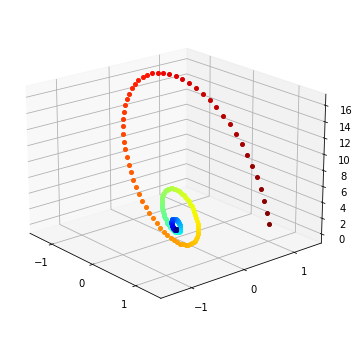

In [12]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=-40)

ax.set_xlim((-1.5, 1.5))
ax.set_ylim((-1.5, 1.5))
ax.set_xticks((-1,0,1))
ax.set_yticks((-1,0,1))

for i in range(n):
    x, y, z = p
    ax.plot([x], [y], [z], 'o', ms=4, color=cm.jet_r(i / n))
    p = A @ p
    
plt.show()

## Linear Algebra

### The span of vectors $u$, $v$, $w$ in $\mathbb{R}$.

We begin by importing the FancyArrowPatch class and extending it.

In [13]:
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

Next we generate our vectors $u$, $v$, $w$ ensuring linear dependence.

In [14]:
α, β = 0.2, 0.1
def f(x, y):
    return α * x + β * y

# Vector locations, by coordinate
x_coords = np.array((3, 3, -3.5))
y_coords = np.array((4, -4, 3.0))
z_coords = f(x_coords, y_coords)

vecs = [np.array((x, y, z)) for x, y, z in zip(x_coords, y_coords, z_coords)]

Next we define the spanning plane.

In [15]:
x_min, x_max = -5, 5
y_min, y_max = -5, 5

grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)

Finally we generate the plot.

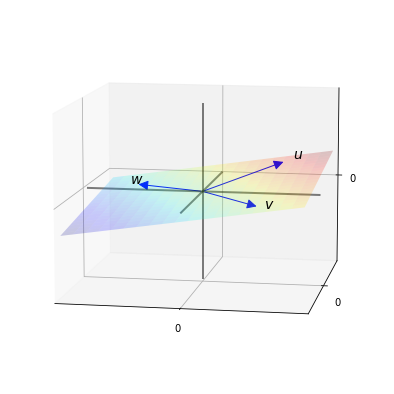

In [16]:
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection ='3d')
ax.view_init(elev=10., azim=-80)

ax.set(xlim=(x_min, x_max), 
       ylim=(x_min, x_max), 
       zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

# Draw the axes
gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)

# Draw the vectors
for v in vecs:
    a = Arrow3D([0, v[0]], 
                [0, v[1]], 
                [0, v[2]], 
                mutation_scale=20, 
                lw=1, 
                arrowstyle="-|>", 
                color="b")
    ax.add_artist(a)


for v, label in zip(vecs, ('u', 'v', 'w')):
    v = v * 1.1
    ax.text(v[0], v[1], v[2], 
            f'${label}$', 
            fontsize=14)

# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)

ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)


plt.show()

## Linear Maps Are Matrices

### Equivalence of the onto and one-to-one properties (for linear maps)

This plot is produced similarly to figures 6.1 and 6.2.

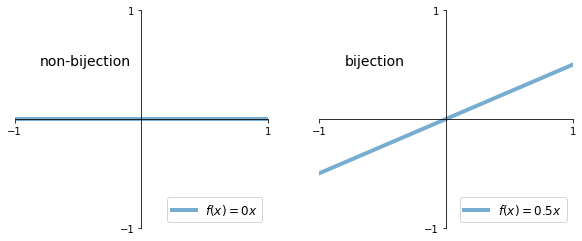

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

x = np.linspace(-2, 2, 10)

titles = 'non-bijection', 'bijection'
labels = '$f(x)=0 x$', '$f(x)=0.5 x$'
funcs = lambda x: 0*x, lambda x: 0.5 * x

for ax, f, lb, ti in zip(axes, funcs, labels, titles):

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    ax.set_yticks((-1,  1))
    ax.set_ylim((-1, 1))
    ax.set_xlim((-1, 1))
    ax.set_xticks((-1, 1))
    y = f(x)
    ax.plot(x, y, '-', linewidth=4, label=lb, alpha=0.6)
    ax.text(-0.8, 0.5, ti, fontsize=14)
    ax.legend(loc='lower right', fontsize=12)
    
plt.show()

## Convexity and Polyhedra

### A polyhedron $P$ represented as intersecting halfspaces.

Inequalities are of the form

$$ a x + b y \leq c $$

To plot the halfspace we plot the line

$$ y = c/b - a/b x $$

and then fill in the halfspace using `fill_between` on points $x, y, \hat y$, where $\hat y$ is either `y_min` or `y_max`.

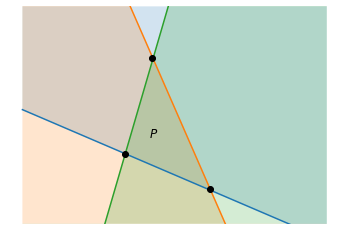

In [18]:
fig, ax = plt.subplots()
plt.axis('off')

x = np.linspace(-10, 14, 200)
y_min, y_max = -2, 3

a1, b1, c1 = 1.0, 8.0, -5.0
y = c1 / b1 - (a1 / b1) * x
ax.plot(x, y, label='$a_1 x_1 + b_1 x_2 = c_1$')
ax.fill_between(x, y, y_max, alpha=0.2)


a2, b2, c2 = 0.5, 0.75, 1.5
y = c2 / b2 - (a2 / b2) * x
ax.plot(x, y, label='$a_2 x_1 + b_2 x_2 = c_2$')
ax.fill_between(x, y, y_min, alpha=0.2)


a3, b3, c3 = -1.0, 1.0, 1.5
y = c3 / b3 - (a3 / b3) * x
ax.plot(x, y, label='$a_3 x_1 + b_3 x_2 = c_3$')
ax.fill_between(x, y, y_min, alpha=0.2)

ax.plot((0.23,), (1.82,), 'ko')
ax.plot((-1.95,), (-0.4,), 'ko')
ax.plot((4.8,), (-1.2,), 'ko')


ax.annotate('$P$', xy=(0, 0), fontsize=12)

ax.set_ylim(y_min, y_max)
plt.show()

## Saddle Points and Duality

### A saddle point $(x^*, \theta^*)$ of the function $L$ (top left)

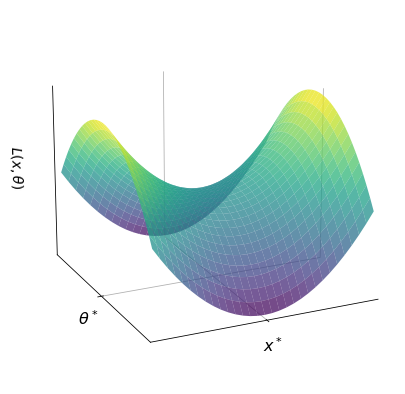

In [19]:
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection ='3d')

plot_args = {'rstride': 1, 'cstride': 1, 'cmap':"viridis",
             'linewidth': 0.4, 'antialiased': True, "alpha":0.75,
             'vmin': -1, 'vmax': 1}

x, y = np.mgrid[-1:1:31j, -1:1:31j]
z = x**2 - y**2

ax.plot_surface(x, y, z, **plot_args)

ax.view_init(azim=245, elev=20)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.set_xticks([0])
ax.set_xticklabels([r"$x^*$"], fontsize=16)
ax.set_yticks([0])
ax.set_yticklabels([r"$\theta^*$"], fontsize=16)


ax.set_zticks([])
ax.set_zticklabels([])

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_zlabel("$L(x,\\theta)$", fontsize=14)

plt.show()

### A saddle point $(x^*, \theta^*)$ of the function $L$  (top right)

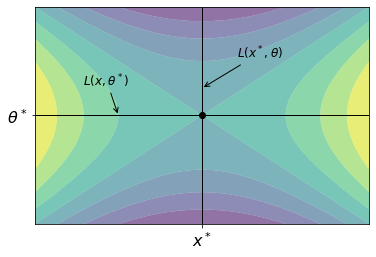

In [20]:
fig, ax = plt.subplots()

plot_args = {'cmap':"viridis", 'antialiased': True, "alpha":0.6,
             'vmin': -1, 'vmax': 1}

x, y = np.mgrid[-1:1:31j, -1:1:31j]
z = x**2 - y**2

ax.contourf(x, y, z, **plot_args)

ax.plot([0], [0], 'ko')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.xticks([ 0],
           [r"$x^*$"], fontsize=16)

plt.yticks([0],
           [r"$\theta^*$"], fontsize=16)

ax.hlines(0, -1, 1, color='k', ls='-', lw=1)
ax.vlines(0, -1, 1, color='k', ls='-', lw=1)

coords=(-35, 30)
ax.annotate(r'$L(x, \theta^*)$', 
             xy=(-0.5, 0),  
             xycoords="data",
             xytext=coords,
             textcoords="offset points",
             fontsize=12,
             arrowprops={"arrowstyle" : "->"})

coords=(35, 30)
ax.annotate(r'$L(x^*, \theta)$', 
             xy=(0, 0.25),  
             xycoords="data",
             xytext=coords,
             textcoords="offset points",
             fontsize=12,
             arrowprops={"arrowstyle" : "->"})

plt.show()

### A saddle point $(x^*, \theta^*)$ of the function $L$ (bottom left)

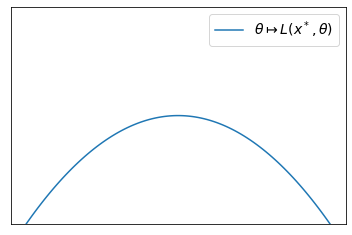

In [21]:
fig, ax = plt.subplots()

x = np.linspace(-1, 1, 100)
ax.plot(x, -x**2, label='$\\theta \mapsto L(x^*, \\theta)$')
ax.set_ylim((-1, 1))
ax.legend(fontsize=14)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

### A saddle point $(x^*, \theta^*)$ of the function $L$ (bottom right)

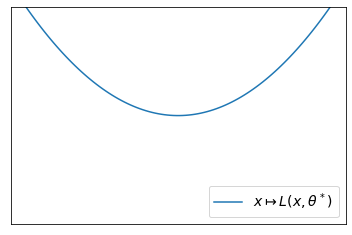

In [22]:
fig, ax = plt.subplots()

x = np.linspace(-1, 1, 100)
ax.plot(x, x**2, label='$x \mapsto L(x, \\theta^*)$')
ax.set_ylim((-1, 1))
ax.legend(fontsize=14, loc='lower right')
ax.set_xticks([])
ax.set_yticks([])

plt.show()